<a href="https://colab.research.google.com/github/UlasSen/ConditionDemo/blob/master/PyTorch-CIFAR_10Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np



100%|██████████| 170M/170M [00:12<00:00, 13.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


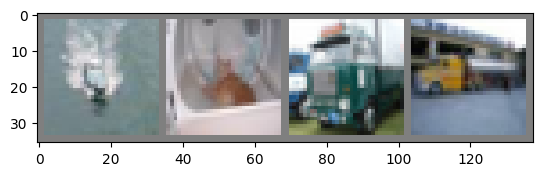

ship cat truck truck


In [ ]:
# CIFAR-10 için veri dönüşümleri (normalize ediliyor)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 Veri Setini İndirme
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# CIFAR-10 Sınıf İsimleri
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Birkaç Görseli Görselleştirme
def imshow(img):
    img = img / 2 + 0.5  # Normalize geri al
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Eğitim verisinden bazı görüntüleri al
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Görselleri göster
imshow(torchvision.utils.make_grid(images))

# Etiketleri yazdır
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # 3 giriş kanalı (RGB), 32 filtre, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 Max Pooling
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Fully Connected layer
        self.fc2 = nn.Linear(512, 10)  # Çıkış katmanı (10 sınıf)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten işlemi
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modeli oluştur
net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Sınıflandırma için uygun kayıp fonksiyonu
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # SGD Optimizer


In [ ]:
import torch.optim as optim

# Cihazı belirle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan cihaz: {device}")

# Modeli GPU'ya taşı
net.to(device)

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 5  # 10 Epoch boyunca eğit

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Veriyi GPU'ya taşı
        inputs, labels = inputs.to(device), labels.to(device)

        # Optimizasyonu sıfırla
        optimizer.zero_grad()

        # İleri yayılım (Forward propagation)
        outputs = net(inputs)

        # Kayıp hesapla
        loss = criterion(outputs, labels)

        # Geri yayılım (Backward propagation)
        loss.backward()

        # Ağırlıkları güncelle
        optimizer.step()

        running_loss += loss.item()

        if i % 1000 == 999:
            print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {running_loss/1000:.3f}")
            running_loss = 0.0

print("Eğitim tamamlandı! 🎉")


Kullanılan cihaz: cuda
[Epoch 1, Batch 1000] Loss: 0.258
[Epoch 1, Batch 2000] Loss: 0.238
[Epoch 1, Batch 3000] Loss: 0.277
[Epoch 1, Batch 4000] Loss: 0.261
[Epoch 1, Batch 5000] Loss: 0.286
[Epoch 1, Batch 6000] Loss: 0.306
[Epoch 1, Batch 7000] Loss: 0.274
[Epoch 1, Batch 8000] Loss: 0.313
[Epoch 1, Batch 9000] Loss: 0.305
[Epoch 1, Batch 10000] Loss: 0.310
[Epoch 1, Batch 11000] Loss: 0.326
[Epoch 1, Batch 12000] Loss: 0.356
[Epoch 2, Batch 1000] Loss: 0.126
[Epoch 2, Batch 2000] Loss: 0.150
[Epoch 2, Batch 3000] Loss: 0.139
[Epoch 2, Batch 4000] Loss: 0.129
[Epoch 2, Batch 5000] Loss: 0.173
[Epoch 2, Batch 6000] Loss: 0.144
[Epoch 2, Batch 7000] Loss: 0.174
[Epoch 2, Batch 8000] Loss: 0.172
[Epoch 2, Batch 9000] Loss: 0.212
[Epoch 2, Batch 10000] Loss: 0.202
[Epoch 2, Batch 11000] Loss: 0.193
[Epoch 2, Batch 12000] Loss: 0.194
[Epoch 3, Batch 1000] Loss: 0.085
[Epoch 3, Batch 2000] Loss: 0.084
[Epoch 3, Batch 3000] Loss: 0.100
[Epoch 3, Batch 4000] Loss: 0.071
[Epoch 3, Batch 500

In [ ]:
correct = 0
total = 0

# Modeli değerlendirme moduna al
net.eval()

# Test verisinde dön
with torch.no_grad():  # Gradyan hesaplamayı kapat (daha hızlı)
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # Verileri GPU'ya taşı

        outputs = net(images)  # Modelden tahmin al
        _, predicted = torch.max(outputs, 1)  # En yüksek olasılığa sahip sınıfı al

        total += labels.size(0)  # Toplam örnek sayısını artır
        correct += (predicted == labels).sum().item()  # Doğru tahminleri say

print(f"Test setindeki doğruluk: %{100 * correct / total:.2f}")


Test setindeki doğruluk: %73.05


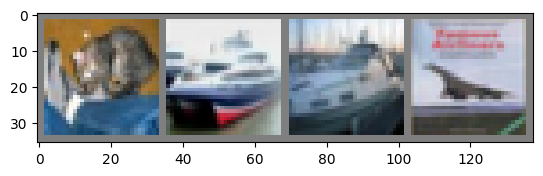

Gerçek etiketler:  cat ship ship airplane
Modelin tahminleri:  dog ship ship ship


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Move images and labels to the device (GPU if available)
images, labels = images.to(device), labels.to(device)

# Görüntüleri ekrana çiz
imshow(torchvision.utils.make_grid(images.cpu())) # Move images back to CPU for imshow

# Gerçek etiketleri yazdır
print("Gerçek etiketler: ", ' '.join(classes[labels[j]] for j in range(4)))

# Modelin tahmin ettiği etiketler
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print("Modelin tahminleri: ", ' '.join(classes[predicted[j]] for j in range(4)))